# Assignment : Introduction to Machine Learning /  Introduction au Machine Learning

 <img src='logo.png'> 
 
# Enseignant :Souleyman Ndoye
## Groupe 1: 
## Nom des membres:
 - ### Mikhael Presley KIBINDA-MOUKENGUE
 - ### Cedric Lontsi SAADIO
 - ### Abdoulaye DIEYE
 - ### Essozimna KPIZIM  

Il est question de realiser des taches sur les Iris de Fisher qui est un dataset par defaut inclut dans la librairie scikitlearn de python

In [1]:
from sklearn.datasets import load_iris # Importation du dataset depuis scikit learn
from sklearn import tree 
iris = load_iris() #Chargement du fichier d'iris

In [2]:
print(iris.DESCR) # Presentation de la description du dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
import pandas as pd
import numpy as np
import bokeh
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models import FactorRange
from bokeh.layouts import row,column,gridplot
from bokeh.transform import factor_cmap
import seaborn as sns
import holoviews as hv
from holoviews import opts
from bokeh.models import ColorBar, LinearColorMapper,BasicTicker

### Preparation des données

In [4]:
irisFeaturesName=[]
for i in iris.feature_names:
    irisFeaturesName.append(i.replace(' (cm)','') ) 
     
irisFeaturesName 

['sepal length', 'sepal width', 'petal length', 'petal width']

In [5]:
irisFeaturesColumn=[]
for i in irisFeaturesName:
    irisFeaturesColumn.append(i.replace(' ','_')) 
irisFeaturesColumn

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
data1= pd.DataFrame(iris.data, columns=irisFeaturesColumn)
data1.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

## Les Taches 

### 1-Description des données en utilisant Bokeh

In [7]:
data1.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

In [8]:
data1.shape

(150, 4)

In [9]:
data1['classe']=iris.target

In [10]:
from math import pi
import pandas as pd
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

x = { 'Setosa': (data1['classe']==0).sum(), 'Versicolour': (data1['classe']==1).sum(), 
     'Virginia': (data1['classe']==2).sum()}

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'typeFleur'})
data['color'] = ['#d87d35','#4280b2','#d45d49']

# represent each value as an angle = value / total * 2pi
data['angle'] = data['value']/data['value'].sum() * 2*pi

p = figure(plot_height=350, title="Pie Chart of classes", toolbar_location=None,
           tools="")
#, tooltips="@typeFleur: @value"
p.wedge(x=0, y=1, radius=0.4, 
        
        # use cumsum to cumulatively sum the values for start and end angles   'angle', include_zero=True
        start_angle=cumsum('angle', include_zero=True), 
        end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_group='typeFleur', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None
output_notebook()
show(p)

Loading BokehJS ...

In [11]:
data

typeFleur  value    color     angle
0       Setosa     50  #d87d35  2.094395
1  Versicolour     50  #4280b2  2.094395
2     Virginia     50  #d45d49  2.094395

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
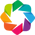

:BoxWhisker   [classe]   (sepal_length)

In [12]:
import holoviews as hv
from holoviews import dim
hv.extension('bokeh')
#from bokeh.sampledata.autompg import autompg as df

title = "Boxplot of sepal_length"
boxwhisker = hv.BoxWhisker(data1, ['classe'], 'sepal_length', label=title)
boxwhisker.opts(show_legend=True, width=600, box_fill_color=dim('origin').str(), cmap='Set1')

In [13]:
k1 = figure(plot_height=200,plot_width=250,y_axis_label='sepal width',x_axis_label='densite')
arr,edges = np.histogram(data1['sepal_width'],density=True)
test = pd.DataFrame({'arr_del':arr,'left':edges[:-1],'right': edges[1:]})
k1.quad(bottom=0, top = arr, left = test['left'], 
       right = test['right'], fill_color='olive',line_color='blue')

k2 = figure(plot_height=200,plot_width=250,y_axis_label='sepal_length',x_axis_label='densite')
arr,edges = np.histogram(data1['sepal_length'],density=True)
test1 = pd.DataFrame({'arr_del':arr,'left':edges[:-1],'right': edges[1:]})
k2.quad(bottom=0, top = arr, left = test['left'], 
       right = test['right'], fill_color='red',line_color='blue')

k3 = figure(plot_height=200,plot_width=250,y_axis_label='petal_width',x_axis_label='densite')
arr,edges = np.histogram(data1['petal_width'],density=True)
test = pd.DataFrame({'arr_del':arr,'left':edges[:-1],'right': edges[1:]})
k3.quad(bottom=0, top = arr, left = test['left'], 
       right = test['right'], fill_color='#42a5f5',line_color='blue')
k4 = figure(plot_height=200,plot_width=250,y_axis_label='petal_length',x_axis_label='densite')
arr,edges = np.histogram(data1['petal_length'],density=True)
test = pd.DataFrame({'arr_del':arr,'left':edges[:-1],'right': edges[1:]})
k4.quad(bottom=0, top = arr, left = test['left'], 
       right = test['right'], fill_color='#f19069',line_color='blue')

show(gridplot([k1,k2,k3,k4], ncols=2))


### 2-Description des données par groupe de categorie

In [14]:
datanew = data1.iloc[:,:4].copy()
y_cat = iris.target.astype('str')
for i in range(len(y_cat)):
    if y_cat[i] =='0':
        y_cat[i]='Setosa'
    elif y_cat[i]=='1':
        y_cat[i]='Versicolour'
    elif y_cat[i]=='2':
        y_cat[i]= 'Virginia'

In [15]:
datanew['classe']= y_cat 
data2 = datanew.groupby(('classe'))# Regroupement des données par classe
data2.describe().T

classe                 Setosa  Versicolour   Virginia
sepal_length count  50.000000    50.000000  50.000000
             mean    5.006000     5.936000   6.588000
             std     0.352490     0.516171   0.635880
             min     4.300000     4.900000   4.900000
             25%     4.800000     5.600000   6.225000
             50%     5.000000     5.900000   6.500000
             75%     5.200000     6.300000   6.900000
             max     5.800000     7.000000   7.900000
sepal_width  count  50.000000    50.000000  50.000000
             mean    3.428000     2.770000   2.974000
             std     0.379064     0.313798   0.322497
             min     2.300000     2.000000   2.200000
             25%     3.200000     2.525000   2.800000
             50%     3.400000     2.800000   3.000000
             75%     3.675000     3.000000   3.175000
             max     4.400000     3.400000   3.800000
petal_length count  50.000000    50.000000  50.000000
             mean    1.462000     4.260000   5.552000
             std     0.173664     0.469911   0.551895
             min     1.000000     3.000000   4.500000
             25%     1.400000     4.000000   5.100000
             50%     1.500000     4.350000   5.550000
             75%     1.575000     4.600000   5.875000
             max     1.900000     5.100000   6.900000
petal_width  count  50.000000    50.000000  50.000000
             mean    0.246000     1.326000   2.026000
             std     0.105386     0.197753   0.274650
             min     0.100000     1.000000   1.400000
             25%     0.200000     1.200000   1.800000
             50%     0.200000     1.300000   2.000000
             75%     0.300000     1.500000   2.300000
             max     0.600000     1.800000   2.500000

In [16]:
source = ColumnDataSource(data2)

",".join(source.column_names)

#cat = [ cate for cate in y ]
from bokeh.palettes import Spectral5

#classe_cmap = factor_cmap('classe', palette=Spectral5, factors=y)

p1 = figure(plot_height=250,plot_width=250, x_range=data2)
p1.vbar(x='classe', top='sepal_length_mean', width=0.4, line_color="white", source=source)

p1.xgrid.grid_line_color = None
p1.xaxis.axis_label = "classe"
p1.yaxis.axis_label = "sepal length"
p1.y_range.start = 0

p2 = figure(plot_height=250,plot_width=250, x_range=data2)
p2.vbar(x='classe', top='sepal_width_mean', width=0.4, line_color="white", source=source)

p2.xgrid.grid_line_color = None
p2.xaxis.axis_label = "classe"
p2.yaxis.axis_label = "sepal width"
p2.y_range.start = 0

p3 = figure(plot_height=250,plot_width=250, x_range=data2)
p3.vbar(x='classe', top='petal_length_mean', width=0.4, line_color="white", source=source)

p3.xgrid.grid_line_color = None
p3.xaxis.axis_label = "classe"
p3.yaxis.axis_label = "petal length"
p3.y_range.start = 0

p4 = figure(plot_height=250,plot_width=250, x_range=data2)
p4.vbar(x='classe', top='petal_width_mean', width=0.4, line_color="white", source=source)

p4.xgrid.grid_line_color = None
p4.xaxis.axis_label = "classe"
p4.yaxis.axis_label = "petal width"
p4.y_range.start = 0

result = gridplot([p1, p2, p3, p4], ncols=2)
show(result)

## 3- Description des données deux par deux 

- Avec matrix de correlation

In [17]:
data1[['sepal_length','sepal_width','petal_length','petal_width']].corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

- ### Avec une figure

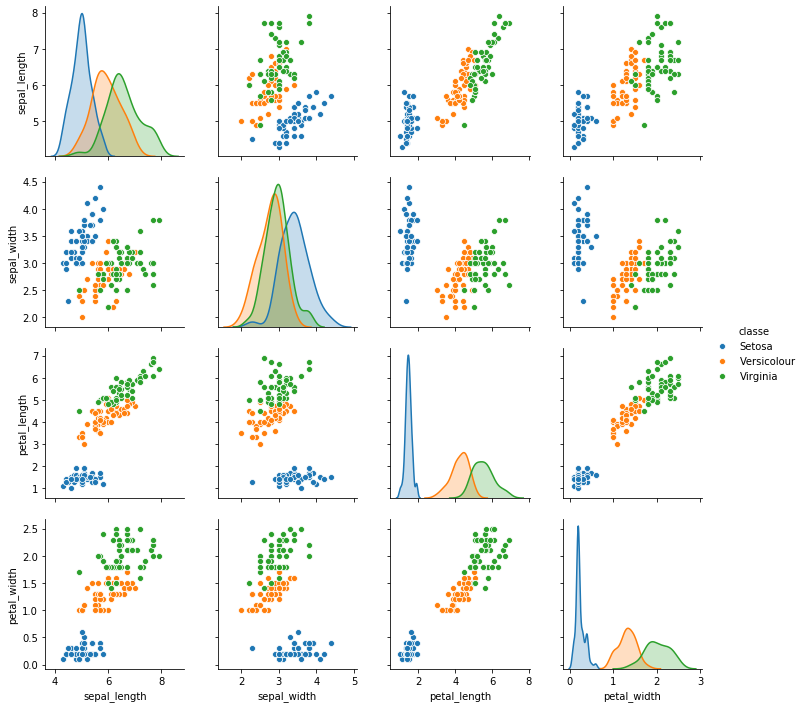

In [18]:
sns.pairplot(datanew,hue='classe')

### 4-Matrice de correlation avec over tools

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
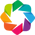

Loading BokehJS ...

:HeatMap   [x,y]   (z)

In [19]:
#Plottage de la matrice de correlation. Lorsque l'on rapproche le curseur sur un carreau, 
# il s'affiche les colonnes correspondantes (x,y) et le coeffiscient de correlation associé(z)
hv.extension('bokeh')
df = data1[['sepal_length','sepal_width','petal_length','petal_width']]
corr = df.corr()
heatmap = hv.HeatMap((corr.columns, corr.index, corr))\
            .opts(tools=['hover'], height=500,line_color='white',
             width=500, toolbar='above')
output_notebook()
heatmap

### 5- Affichage des plus grands features informatives

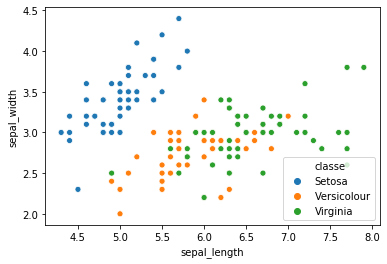

In [20]:
sns.scatterplot(x='sepal_length', y='sepal_width',
              hue='classe', data=datanew);

## Tache 2

- ### Utilisation de la methode bayes naives pour la prediction

In [21]:
X=datanew[['sepal_length','sepal_width','petal_length','petal_width']].values
y=iris.target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_pred = gnb.fit(X_train,y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(y_test != y_pred).sum()))


Number of mislabeled points out of a total 150 points : 1


- ### Utiliser l\'arbre de decision pour la prediction

### Spliting in training and validation sample

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree = decision_tree.fit(X_train, y_train)

In [24]:
# Prediction 
y_pred = decision_tree.predict(X_test) 
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [25]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 0


In [26]:
#Mesure de l'accuracité
accuracy_score(y_test,y_pred)
#Il semble que le modele soit trop parfait ou bien il peut avoir surapprentissage

1.0

## Construction de l'arbre

In [27]:
from sklearn.tree.export import export_text

# X = iris['data']
# y = iris['target']
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



## Make shure (graphicaly that both your train and test sets avec quite similar in term of distrbution).

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

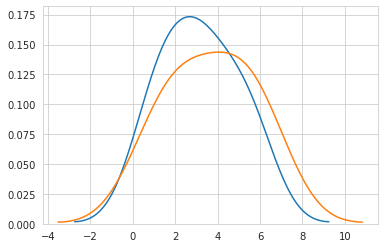

In [29]:
p_train = sns.distplot(X_train[0], hist=False)
p_test = sns.distplot(X_test[0], hist=False)

Verification between train data and test data

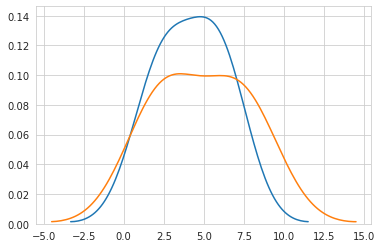

In [30]:
p_train = sns.distplot(X_train[2], hist=False)
p_test = sns.distplot(X_test[2], hist=False)

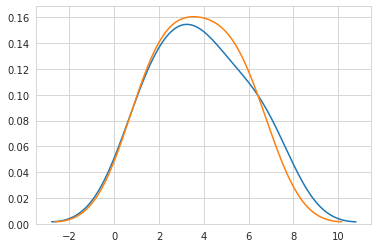

In [31]:
p_train = sns.distplot(X_train[3], hist=False)
p_test = sns.distplot(X_test[3], hist=False)

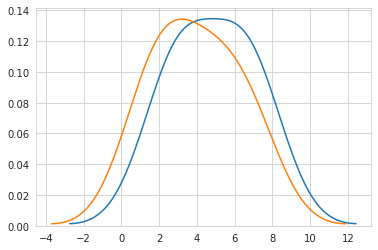

In [32]:
p_train = sns.distplot(X_train[4], hist=False)
p_test = sns.distplot(X_test[4], hist=False)

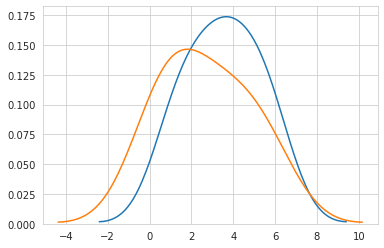

In [33]:
p_train = sns.distplot(X_train[5], hist=False)
p_test = sns.distplot(X_test[5], hist=False)

## Tache 3 : ACP

In [34]:
data_pca=data1[['sepal_length','sepal_width','petal_length','petal_width']]
data_pca.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [35]:
# We first of Scale data
import pandas as pd
from sklearn import preprocessing

x = data_pca.values #returns a numpy array
x_scaled = preprocessing.scale(x)
data_scaled = pd.DataFrame(x_scaled)
data_scaled.columns = data_pca.columns

In [36]:
data_scaled.describe().T

count          mean      std       min       25%       50%  \
sepal_length  150.0 -1.468455e-15  1.00335 -1.870024 -0.900681 -0.052506   
sepal_width   150.0 -1.823726e-15  1.00335 -2.433947 -0.592373 -0.131979   
petal_length  150.0 -1.610564e-15  1.00335 -1.567576 -1.226552  0.336478   
petal_width   150.0 -9.473903e-16  1.00335 -1.447076 -1.183812  0.132510   

                   75%       max  
sepal_length  0.674501  2.492019  
sepal_width   0.558611  3.090775  
petal_length  0.762758  1.785832  
petal_width   0.790671  1.712096

### Correlation matrix

In [37]:
cormat = data_pca.corr() #ACP start here
cormat

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

In [38]:
from numpy import linalg as LA
eigenvalues = LA.eig(cormat)[0]
eigenvectors = LA.eig(cormat)[1]

print('Eigenvalues: \n', eigenvalues)
print('\n')
print('Eigenvectors: \n',eigenvectors)

Eigenvalues: 
 [2.91849782 0.91403047 0.14675688 0.02071484]


Eigenvectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [39]:
from numpy import linalg as LA
import numpy as np
axe = np.arange(4)+1
eigen_values = LA.eig(cormat)[0]

In [40]:
import numpy as np
import pandas as pd

# Creating a 2 dimensional numpy array
data = np.array([axe, eigen_values])
print(data)

[[1.         2.         3.         4.        ]
 [2.91849782 0.91403047 0.14675688 0.02071484]]


In [41]:
dic__ = {'axe' : np.arange(4)+1,
        'eigen_values' : LA.eig(cormat)[0]
        }
pdv = pd.DataFrame(dic__)
pdv['proportion'] = pdv['eigen_values']/pdv['eigen_values'].sum()*100
pdv['pct_cumule'] = pdv['proportion'].cumsum() #Contribution cumulée
pdv

axe  eigen_values  proportion  pct_cumule
0    1      2.918498   72.962445   72.962445
1    2      0.914030   22.850762   95.813207
2    3      0.146757    3.668922   99.482129
3    4      0.020715    0.517871  100.000000

In [42]:
from bokeh.io import notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.models import HoverTool

#output_file("Eigenvalues.html")

# create a column data source for the plots to share
source = ColumnDataSource(data=pdv)

TOOLS = "box_select,lasso_select,help"


hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

# create a new plot and add a renderer
left = figure(tools=[''], plot_width=300, plot_height=300, title='Eigenvalues curve')
left.line('axe', 'eigen_values', source=source)

# create another new plot and add a renderer
middle = figure(tools=[''], plot_width=300, plot_height=300, title='Proportion(Inertie) curve')
middle.line('axe', 'proportion', source=source)

# create another new plot and add a renderer
right = figure(tools=[''], plot_width=300, plot_height=300, title='Cummulative eigenvalues plot')
right.line('axe', 'pct_cumule', source=source)

p = gridplot([[left, middle,right]])
output_notebook()
show(p)

Loading BokehJS ...

In [43]:
print(round(pdv.iloc[1][3],2),'%')

95.81 %


In [44]:
corrVarFac_ = np.sqrt(eigenvalues)*eigenvectors*-1
corrVarFac_

array([[-0.89016876,  0.36082989,  0.27565767, -0.03760602],
       [ 0.46014271,  0.88271627, -0.09361987,  0.01777631],
       [-0.99155518,  0.02341519, -0.05444699,  0.11534978],
       [-0.96497896,  0.06399985, -0.24298265, -0.0753595 ]])

In [45]:
corrVarFac = pd.DataFrame(corrVarFac_)
corrVarFac.columns = ['F1','F2','F3','F4']
corrVarFac = corrVarFac.set_index( data_pca.columns)

In [46]:
corrVarFac

F1        F2        F3        F4
sepal_length -0.890169  0.360830  0.275658 -0.037606
sepal_width   0.460143  0.882716 -0.093620  0.017776
petal_length -0.991555  0.023415 -0.054447  0.115350
petal_width  -0.964979  0.064000 -0.242983 -0.075360

In [47]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, Arrow, OpenHead

from bokeh.io import output_notebook
output_notebook()

#output_file("label.html", title="label.py example")

source = ColumnDataSource(data=corrVarFac[['F1', 'F2']])

p = figure(title='F1 x F2',
           x_range=Range1d(-1.1, 1.1),
           y_range=Range1d(-1.1, 1.1))

p.scatter(x='F1', y='F2', size=8, source=source)

p.xaxis[0].axis_label = 'F1'
p.yaxis[0].axis_label = 'F2'

labels = LabelSet(x='F1', y='F2', text='index', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')

p.add_layout(labels)

# Cercle de corrélation
p.circle(0, 0, size=20,radius = 1, color="#42a5f5", alpha=0.1)

# Plot segment for Fact1 & Fact2
p.segment(x0=[0,-1], y0=[-1,0], 
          x1=[0,1] , y1=[1,0], 
          color="grey", line_width=1.5)

# Plot arrows
p.add_layout(Arrow(end=OpenHead(line_color="blue", line_width=2),
                                        x_start=0, y_start=0, 
                   x_end = corrVarFac.loc['sepal_length', ['F1']].item(), 
                   y_end = corrVarFac.loc['sepal_length', ['F2']].item()))

p.add_layout(Arrow(end=OpenHead(line_color="blue", line_width=2),
                                        x_start=0, y_start=0, 
                   x_end = corrVarFac.loc['sepal_width', ['F1']].item(), 
                   y_end = corrVarFac.loc['sepal_width', ['F2']].item()))

p.add_layout(Arrow(end=OpenHead(line_color="blue", line_width=2),
                                        x_start=0, y_start=0, 
                   x_end = corrVarFac.loc['petal_length', ['F1']].item(), 
                   y_end = corrVarFac.loc['petal_length', ['F2']].item()))

p.add_layout(Arrow(end=OpenHead(line_color="blue", line_width=2),
                                        x_start=0, y_start=0, 
                   x_end = corrVarFac.loc['petal_width', ['F1']].item(), 
                   y_end = corrVarFac.loc['petal_width', ['F2']].item()))

output_notebook()
show(p) # Cercle de correlation des variables

Loading BokehJS ...

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: `item` has been deprecated and will be removed in a future version
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: `item` has been deprecated and will be removed in a future version
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: `item` has been deprecated and will be removed in a future version
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: `item` has been deprecated and will be removed in a future version
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: `item` has been deprecated and will be removed in a future version
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: `item` has been deprecated and will be removed in a future version
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:51: FutureWarning: `it

Loading BokehJS ...

In [48]:
datanew

sepal_length  sepal_width  petal_length  petal_width    classe
0             5.1          3.5           1.4          0.2    Setosa
1             4.9          3.0           1.4          0.2    Setosa
2             4.7          3.2           1.3          0.2    Setosa
3             4.6          3.1           1.5          0.2    Setosa
4             5.0          3.6           1.4          0.2    Setosa
..            ...          ...           ...          ...       ...
145           6.7          3.0           5.2          2.3  Virginia
146           6.3          2.5           5.0          1.9  Virginia
147           6.5          3.0           5.2          2.0  Virginia
148           6.2          3.4           5.4          2.3  Virginia
149           5.9          3.0           5.1          1.8  Virginia

[150 rows x 5 columns]

In [49]:
colors = []
for i in y_cat :
    if i=='Setosa':
            colors.append('#a50026') 
    elif i=='Versicolour':
             colors.append('green')
    elif i=='Virginia':
             colors.append('#d45d49')


In [50]:
# output_file("label.html", title="label.py example")
data=datanew.copy()
data['colors']=colors
source = ColumnDataSource(data)

p1 = figure(plot_width=450, plot_height=450,title='sepal_length x sepal_width')

p1.circle(x='sepal_length', y='sepal_width', size=10,color='colors',fill_color='colors',legend_field='classe', source=source,)

p1.xaxis[0].axis_label = 'sepal_length'
p1.yaxis[0].axis_label = 'sepal_width'

# labels = LabelSet(x='sepal_length', y='sepal_width',text='classe', level='glyph',
#               x_offset=5, y_offset=5, source=source, render_mode='canvas')

#p.add_layout(labels)

# Coordonnées barycentre dans ce plan
yg = np.mean(data1['sepal_width'])
xg = np.mean(data1['sepal_length'])

p1.circle(x=xg, y=yg, size=16, alpha=0.9,color = 'black')


p2 = figure(plot_width=450, plot_height=450,title='petal_length x petal_width')

p2.circle(x='petal_length', y='petal_width', size=10,color='colors',fill_color='colors',legend_field='classe', source=source,)

p2.xaxis[0].axis_label = 'petal_length'
p2.yaxis[0].axis_label = 'petal_width'

# labels = LabelSet(x='sepal_length', y='sepal_width',text='classe', level='glyph',
#               x_offset=5, y_offset=5, source=source, render_mode='canvas')

#p.add_layout(labels)

# Coordonnées barycentre dans ce plan
yg = np.mean(data1['petal_width'])
xg = np.mean(data1['petal_length'])

p2.circle(x=xg, y=yg, size=16, alpha=0.9,color = 'black')

show(gridplot([p1,p2,], ncols=2))

In [51]:
data_scaled

sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]

In [52]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame (data = principal_components, columns=['F1','F2'])

In [53]:
finalDf = pd.concat([principalDf, datanew[['classe']]],axis=1)
finalDf

F1        F2    classe
0   -2.264703  0.480027    Setosa
1   -2.080961 -0.674134    Setosa
2   -2.364229 -0.341908    Setosa
3   -2.299384 -0.597395    Setosa
4   -2.389842  0.646835    Setosa
..        ...       ...       ...
145  1.870503  0.386966  Virginia
146  1.564580 -0.896687  Virginia
147  1.521170  0.269069  Virginia
148  1.372788  1.011254  Virginia
149  0.960656 -0.024332  Virginia

[150 rows x 3 columns]

## Projecion des individus sur le plan factoriel

In [54]:
U,D,V = np.linalg.svd(data_scaled)
D = D**2/150
U_2=U[:,0:2]
D_2=np.diag(D[0:2])
Z_2=np.matmul(U_2,D_2)

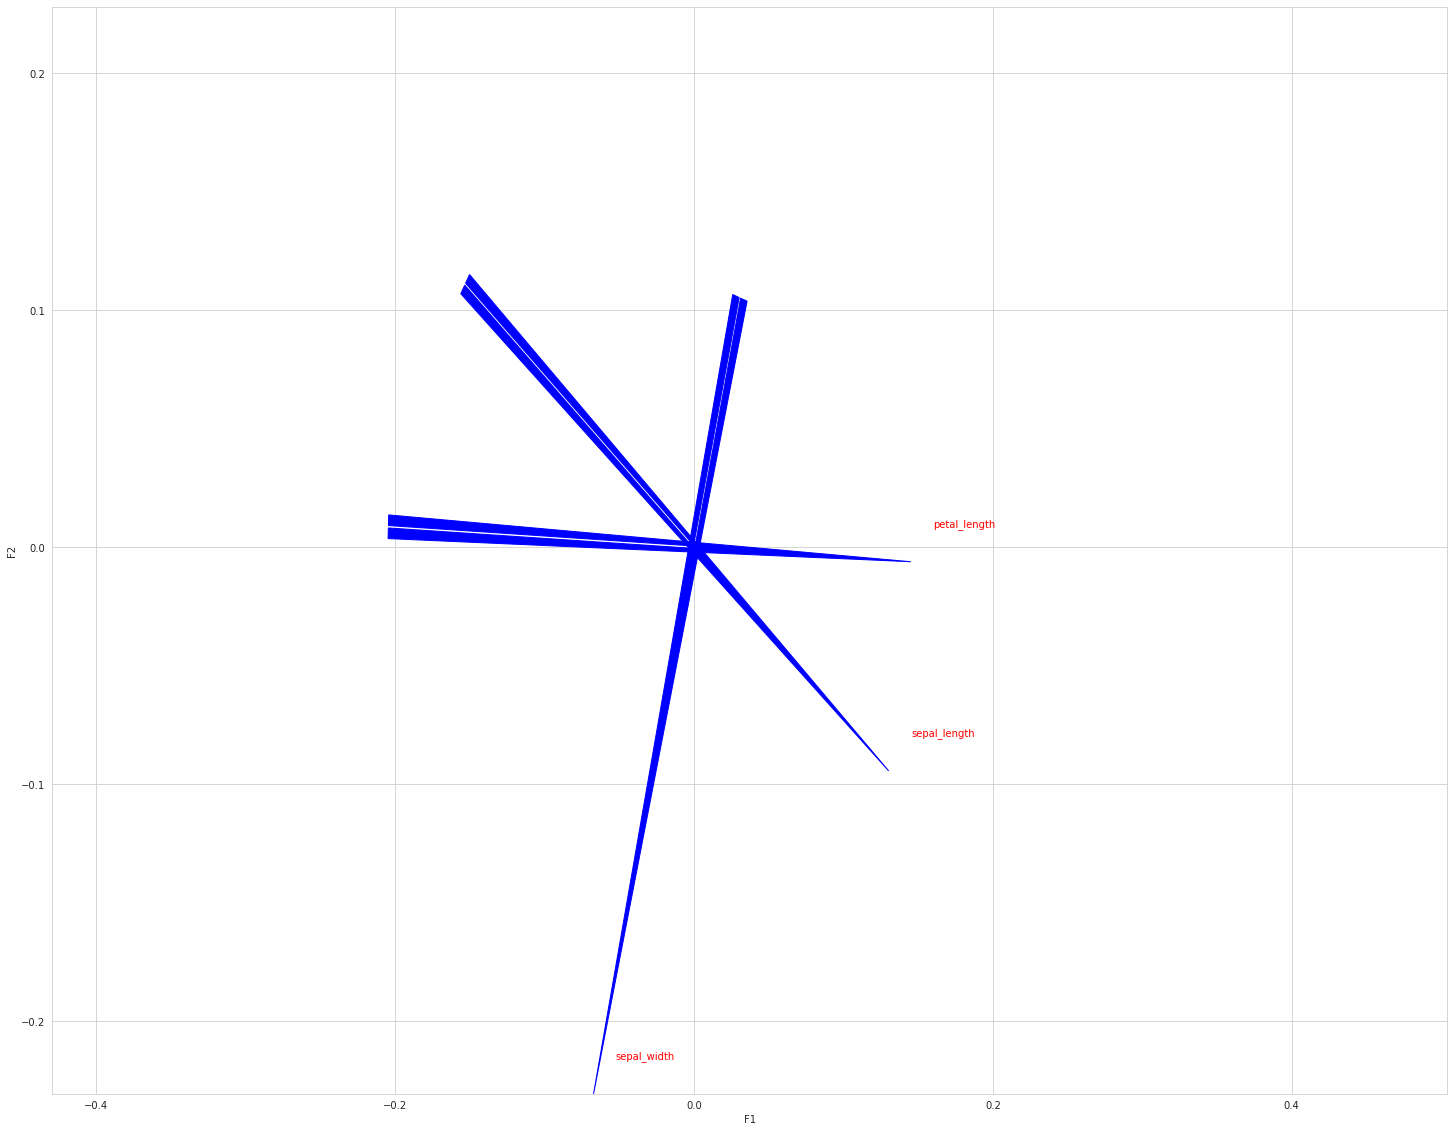

In [55]:
V_2=V.T[:,0:2]
fig, ax = plt.subplots(figsize=(25,20))
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.scatter(x=Z_2[:,0],y=Z_2[:,1],s=0)
#txt1=datanew.classe
txt2=datanew.columns[0:]
gamma=0.25
# for i, txt1 in enumerate(txt1):
#     ax.annotate(txt1, (Z_2[i,0],Z_2[i,1]))
for i in range(data_scaled.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_2[i,0],gamma*V_2[i,1],
             color="blue",
            length_includes_head=True, head_width=0.01, head_length=0.35)
    
    ax.annotate(txt2[i], (gamma*(V_2[i,0]+0.06),gamma*(V_2[i,1]+0.06)),
                color='red')
plt.show()